In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle as pkl
from sklearn.decomposition import PCA

In [13]:
df = []

In [14]:
for filename in os.listdir("data/train/"):
    image = Image.open("data/train/"+filename)
    image = np.array(image)
    image = image.reshape([1, 224, 224, 3])
    df.append(image)

In [15]:
df = np.concat(df, axis=0)

In [21]:
with open("data/train_images.pkl", "wb") as file:
    pkl.dump(df, file)

In [2]:
with open("../data/train_images.pkl", "rb") as file:
    df = pkl.load(file)

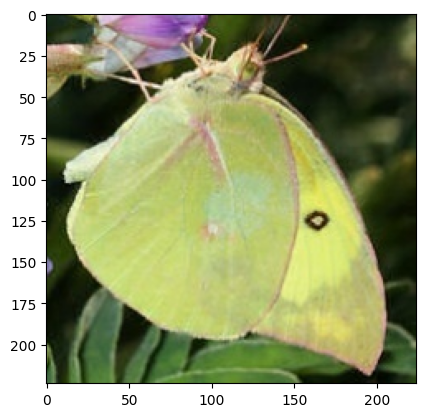

In [3]:
plt.imshow(df[0].reshape([224, 224, 3]))

In [4]:
model = tf.keras.applications.ResNet50(weights="imagenet")

In [5]:
preprocessed = model.predict(df)

204/204 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step


In [6]:
with open("../data/train_images_preprocessed2.pkl", "wb") as file:
    pkl.dump(preprocessed, file)

In [7]:
df.shape

(6499, 224, 224, 3)

In [8]:
preprocessed.shape

(6499, 1000)

In [9]:
preprocessed[0].shape

(1000,)

In [10]:
features = []

for i in range(preprocessed.shape[0]):
    features.append(preprocessed[i].reshape([1, -1]))

In [11]:
concatenated = np.concat(features, axis=0)

In [12]:
concatenated.shape

(6499, 1000)

In [13]:
preprocessed2 = preprocessed.reshape([preprocessed.shape[0], -1])

In [14]:
np.all(preprocessed2 == concatenated)

np.True_

In [15]:
pca = PCA(n_components=2)

In [16]:
x = pca.fit_transform(preprocessed)

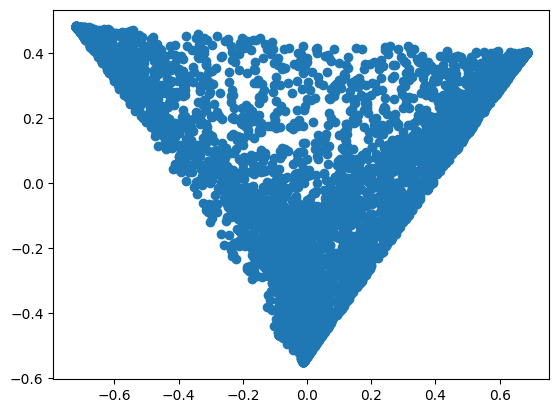

In [18]:
plt.scatter(x[:, 0], x[:,1])

In [19]:
filenames = []

for filename in os.listdir("../data/train/"):
    filenames.append(filename)

In [20]:
labels = pd.read_csv("../data/Training_set.csv")

In [22]:
labels.set_index("filename", inplace=True)

In [25]:
labels = labels.loc[filenames, :]

In [26]:
labels

label
filename                                 
Image_1.jpg              SOUTHERN DOGFACE
Image_10.jpg                  RED POSTMAN
Image_100.jpg                 COPPER TAIL
Image_1000.jpg              SLEEPY ORANGE
Image_1001.jpg                RED CRACKER
...                                   ...
Image_995.jpg   AFRICAN GIANT SWALLOWTAIL
Image_996.jpg                 COPPER TAIL
Image_997.jpg             ORCHARD SWALLOW
Image_998.jpg               SLEEPY ORANGE
Image_999.jpg               QUESTION MARK

[6499 rows x 1 columns]

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
y = OrdinalEncoder().fit_transform(pd.DataFrame(labels["label"]))

In [29]:
pd.DataFrame(labels)

label
filename                                 
Image_1.jpg              SOUTHERN DOGFACE
Image_10.jpg                  RED POSTMAN
Image_100.jpg                 COPPER TAIL
Image_1000.jpg              SLEEPY ORANGE
Image_1001.jpg                RED CRACKER
...                                   ...
Image_995.jpg   AFRICAN GIANT SWALLOWTAIL
Image_996.jpg                 COPPER TAIL
Image_997.jpg             ORCHARD SWALLOW
Image_998.jpg               SLEEPY ORANGE
Image_999.jpg               QUESTION MARK

[6499 rows x 1 columns]

In [30]:
np.unique(y)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74.])

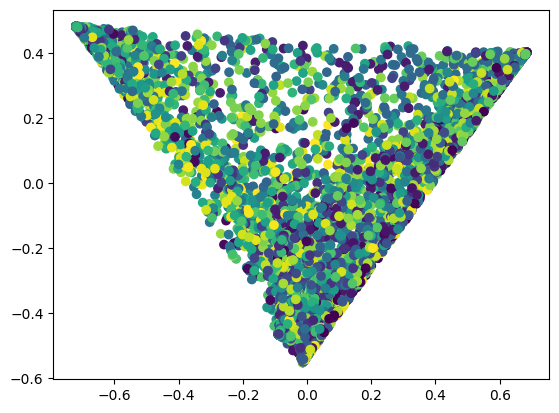

In [32]:
plt.scatter(x[:, 0], x[:, 1], c=np.array(y))

In [39]:
labels

label         1      pca1
filename                                                     
Image_1.jpg              SOUTHERN DOGFACE -0.064417 -0.064417
Image_10.jpg                  RED POSTMAN -0.073613 -0.073613
Image_100.jpg                 COPPER TAIL  0.641770  0.641770
Image_1000.jpg              SLEEPY ORANGE  0.036466  0.036466
Image_1001.jpg                RED CRACKER -0.079334 -0.079334
...                                   ...       ...       ...
Image_995.jpg   AFRICAN GIANT SWALLOWTAIL -0.001647 -0.001647
Image_996.jpg                 COPPER TAIL  0.311835  0.311835
Image_997.jpg             ORCHARD SWALLOW -0.078180 -0.078180
Image_998.jpg               SLEEPY ORANGE  0.157249  0.157249
Image_999.jpg               QUESTION MARK  0.446683  0.446683

[6499 rows x 3 columns]

In [40]:
labels["pca1"] = x[:, 0]
labels["pca2"] = x[:, 1]

<Axes: xlabel='pca1', ylabel='pca2'>

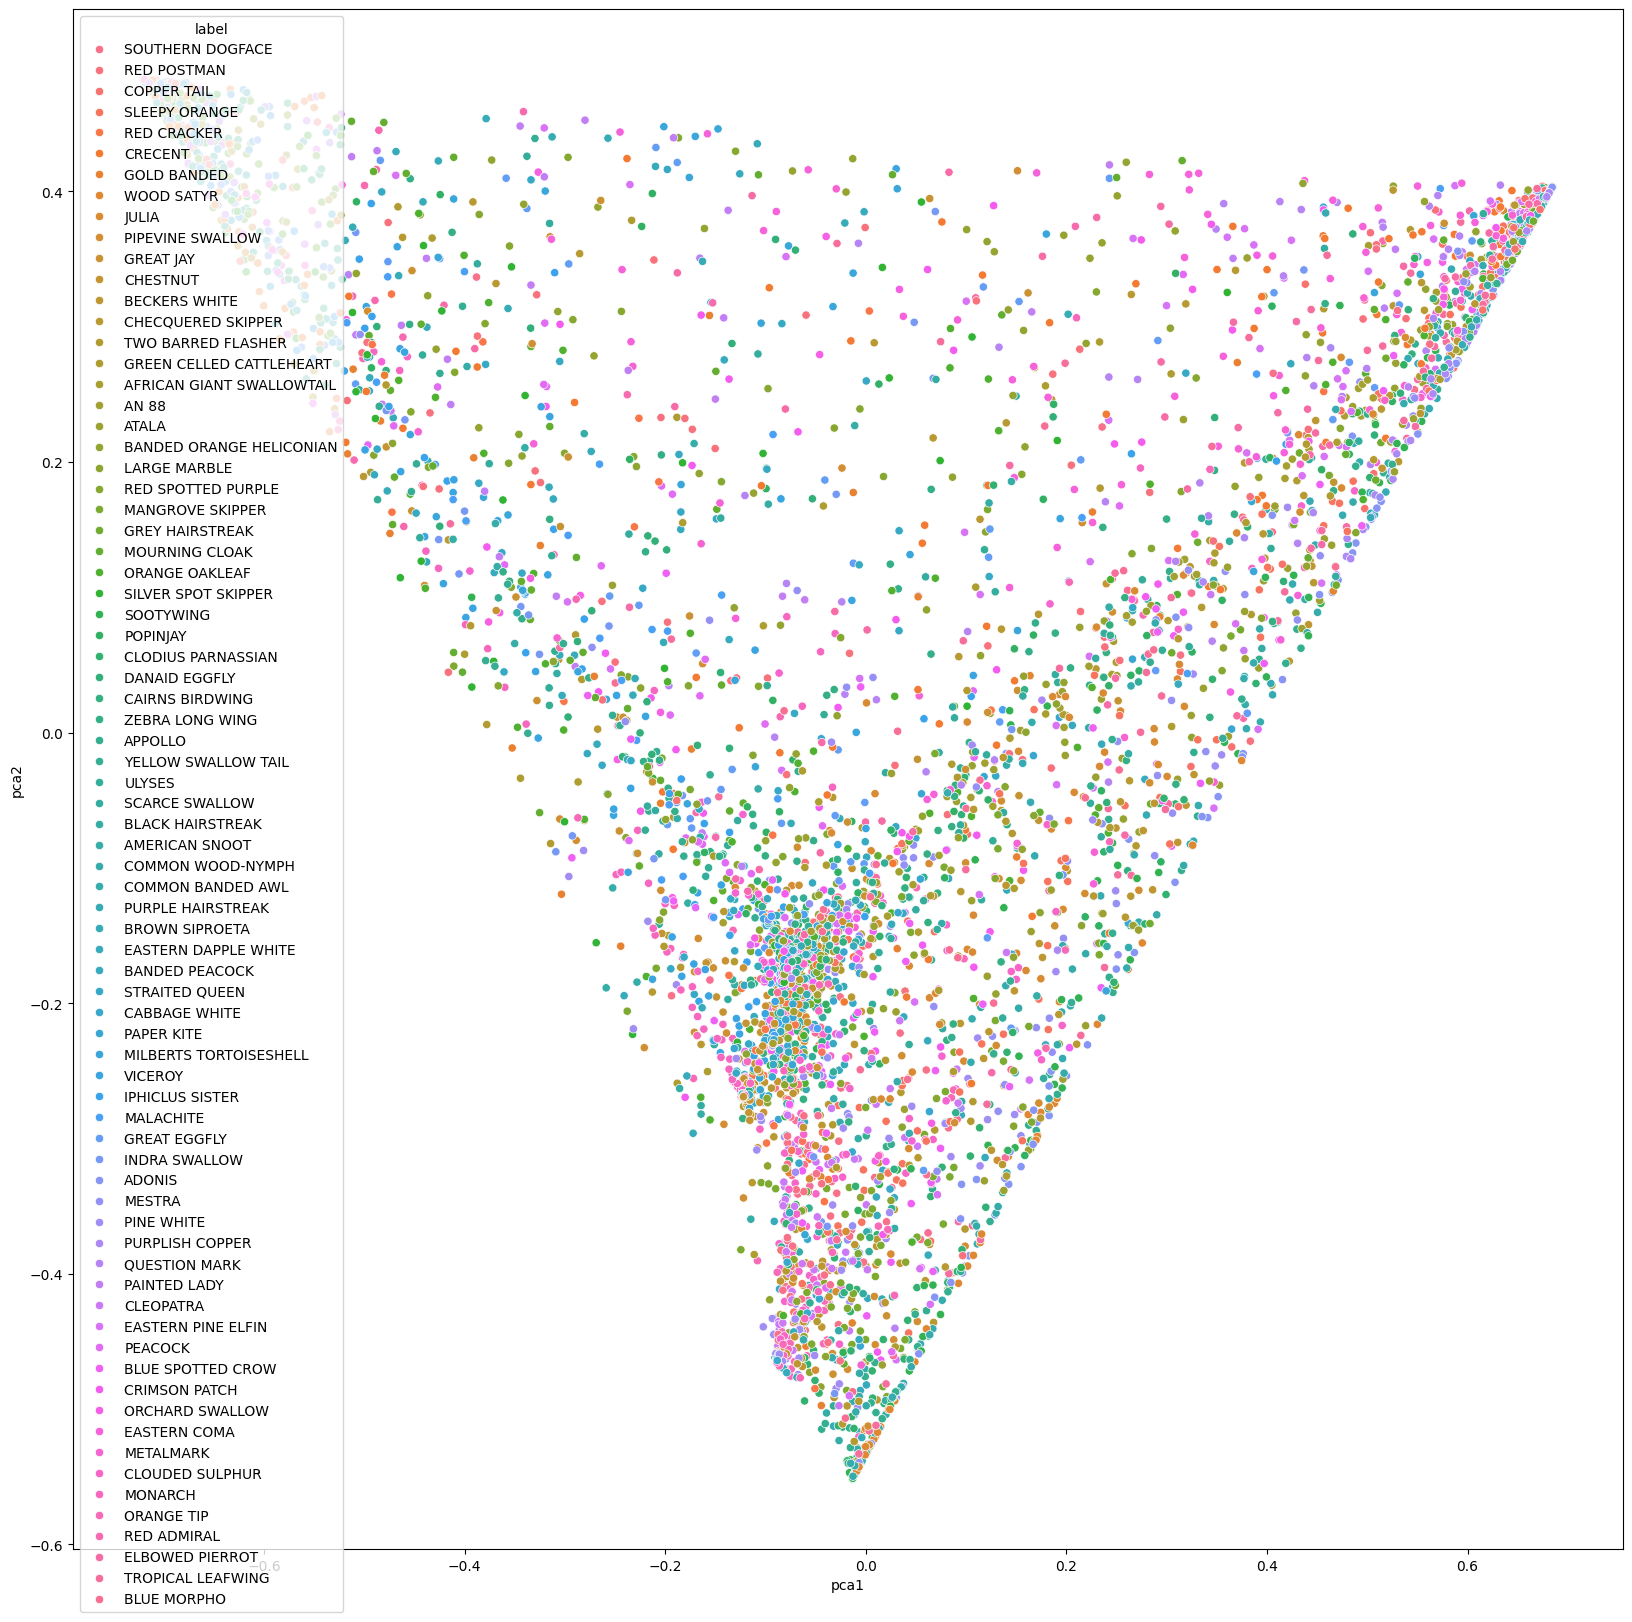

In [45]:
plt.figure(figsize=(20, 20))
sns.scatterplot(labels, x="pca1", y="pca2", hue="label", alpha = 1)

In [24]:
pca = PCA(n_components=0.99)

In [25]:
x = pca.fit_transform(preprocessed2)

In [27]:
with open("../data/train_images_preprocessed_pca.pkl", "wb") as file:
    pkl.dump(x, file)

In [28]:
x.shape

(6499, 5931)

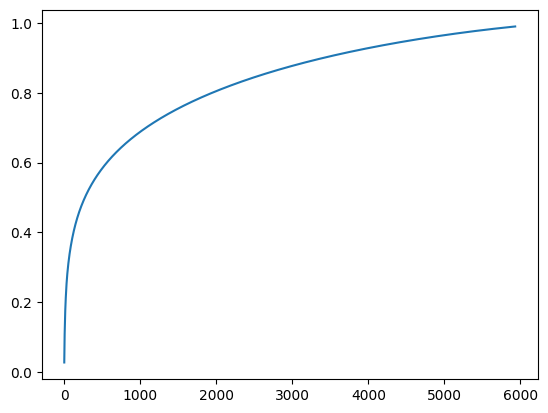

In [29]:
plt.plot(np.arange(x.shape[1]), np.cumsum(pca.explained_variance_ratio_))

# Obrabianie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle as pkl

In [2]:
x = []

In [3]:
for filename in os.listdir("../data/train/"):
    x.append(filename)

In [4]:
y = []

In [5]:
for filename in os.listdir("../data/train/"):
    y.append(filename)

In [6]:
x == y

True

In [10]:
labels = pd.read_csv("../data/Training_set.csv")

In [13]:
with open("../data/train_images_preprocessed_pca.pkl", "rb") as file:
    pca = pkl.load(file)

In [14]:
pca.shape

(6499, 5931)

In [15]:
series = []

In [16]:
for i in range(pca.shape[1]):
    s = pd.Series(pca[:, i])
    s.name = str(i)
    series.append(s)

In [17]:
series = pd.concat(series, axis=1)

In [18]:
df = pd.concat([labels, series], axis=1)

In [19]:
df.head()

filename                     label           0          1           2  \
0  Image_1.jpg          SOUTHERN DOGFACE  -29.304474 -53.646305  157.319061   
1  Image_2.jpg                    ADONIS  108.749649 -99.934326   85.063881   
2  Image_3.jpg            BROWN SIPROETA  -72.921227  45.466625   -4.836839   
3  Image_4.jpg                   MONARCH  -58.314491 -20.460058  126.917984   
4  Image_5.jpg  GREEN CELLED CATTLEHEART  -28.536684 -75.453117  -35.900543   

           3          4          5          6           7  ...      5921  \
0 -37.507381  -8.112730  -9.215195 -18.801731   -7.313122  ...  3.331438   
1 -62.675640 -28.783670  87.016594  42.713871  -36.572647  ...  1.389709   
2  28.959473 -44.078339 -25.076443  17.222084  -26.771353  ... -0.689042   
3   0.923369 -30.056654 -33.215652 -11.057313  105.429039  ... -0.215495   
4 -79.561287   5.244801 -41.748314  65.563599   -6.384548  ...  6.245618   

       5922      5923      5924      5925      5926      5927      5928  \
0  4.045226  2.204854 -5.928223 -3.792308 -1.042500  0.018703 -2.548595   
1  0.111966  0.193220  0.895389  0.232029 -0.857234  0.477403 -3.163659   
2  2.492748 -1.598790 -3.116568 -2.399501  0.832368 -1.276818  0.761243   
3  0.344874 -0.066115 -0.937729  0.481706 -0.194572  1.618143 -1.837914   
4 -1.720825 -1.834850  1.126361  0.219346  1.820006  0.170160  3.006421   

       5929      5930  
0  0.367212 -0.804576  
1 -4.254457  0.319159  
2 -0.671634 -2.615820  
3  0.782260  1.481876  
4  6.997216  3.157905  

[5 rows x 5933 columns]

In [20]:
from scipy.stats import kruskal

In [21]:
grupy = [group['0'].values for name, group in df.groupby('label')]

stat, p = kruskal(*grupy)

print(f"Kruskal-Wallis H-test: statystyka = {stat:.4f}, p-value = {p:.4e}")

Kruskal-Wallis H-test: statystyka = 87.5652, p-value = 1.3405e-01


In [22]:
p_values = []
statystyki = []

for i in range(5930+1):
    grupy = [group[str(i)].values for name, group in df.groupby('label')]
    stat, p = kruskal(*grupy)
    p_values.append(p)
    statystyki.append(stat)

KeyError: '5931'

In [23]:
with open("p_values_kruskal.pkl", "wb") as file:
    pkl.dump(p_values, file)

In [24]:
p_values = np.array(p_values)

In [25]:
new_features = np.argwhere(p_values < 2e-2)

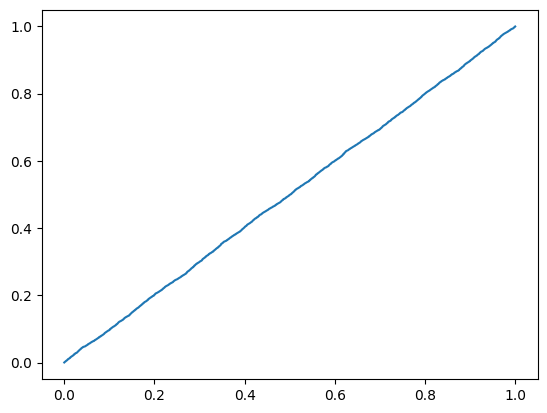

In [26]:
plt.plot(np.linspace(0, 1, len(p_values)), np.sort(p_values))

<Axes: ylabel='Count'>

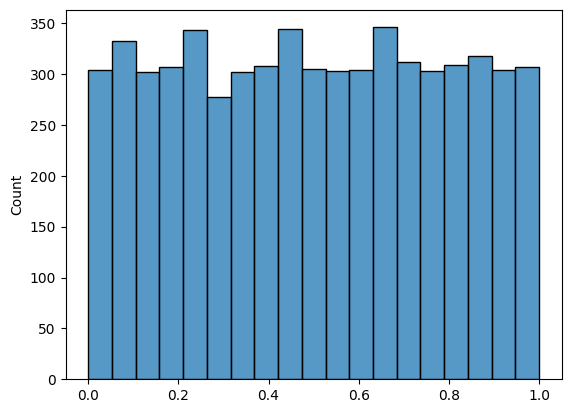

In [27]:
sns.histplot(p_values)

In [28]:
p_values = np.array(p_values)
statystyki = np.array(statystyki)

In [29]:
np.sum(p_values < 0.05)

np.int64(286)

In [30]:
np.sum(p_values < 1e-3), np.sum(p_values < 1e-2)

(np.int64(4), np.int64(50))

In [31]:
np.argwhere(p_values < 1e-3)

array([[2580],
       [4006],
       [4455],
       [5068]])

<Axes: xlabel='2580', ylabel='Count'>

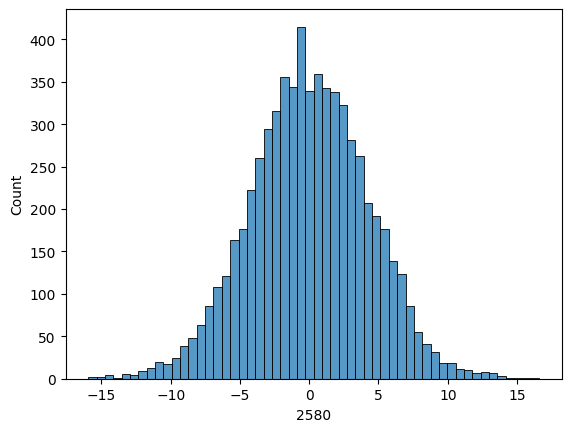

In [32]:
sns.histplot(df["2580"])

In [36]:
labels = np.array([str(i) for i in range(5931)])

In [39]:
 np.sum(p_values < 5e-2)

np.int64(286)

In [40]:
interesting = labels[p_values < 5e-2]

In [41]:
import scikit_posthocs as sp

# Dunn's test z korektą p-value
posthoc = sp.posthoc_dunn(df, val_col='2580', group_col='label', p_adjust='bonferroni')

<Axes: >

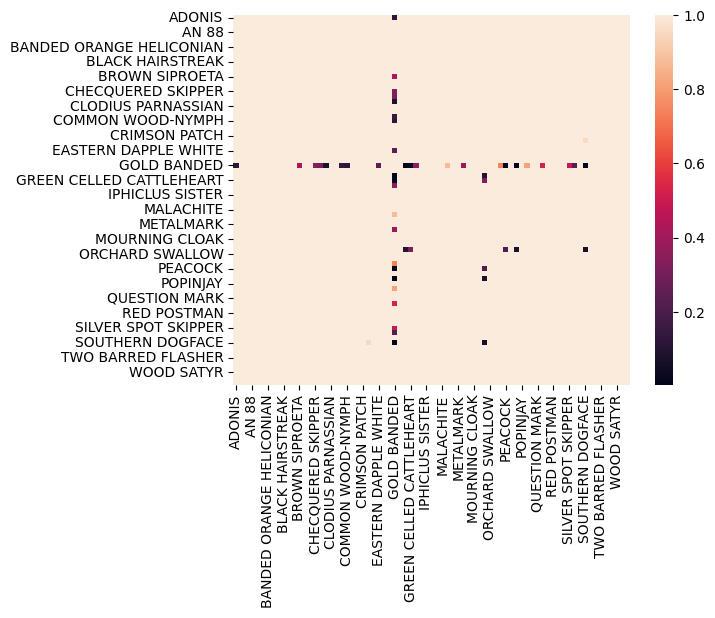

In [42]:
sns.heatmap(posthoc)

In [43]:
np.min(posthoc)

np.float64(0.0032434300862115347)

In [44]:
interesting.shape

(286,)

In [45]:
matrices = []
counter = 0

for colname in interesting:
    counter += 1
    if counter % 30 == 0:
        print(f"{counter//30}/10")
    posthoc = sp.posthoc_dunn(df, val_col=colname, group_col='label', p_adjust='bonferroni')
    matrices.append(posthoc)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


In [46]:
min_scores = np.array([np.min(matrix) for matrix in matrices])

In [47]:
np.sum(min_scores < 0.05)

np.int64(49)

In [48]:
good_matrices = [matrix for matrix in matrices if np.min(matrix) < 5e-2]

In [49]:
len(good_matrices)

49

In [54]:
plt.figure(figsize=(2*15, 15 * np.ceil(len(good_matrices) / 2)))
for i in range(len(good_matrices)):
    plt.subplot(int(np.ceil(len(good_matrices) / 2)), 2, i + 1)
    sns.heatmap(good_matrices[i])

In [55]:
min_scores = np.array([np.min(matrix) for matrix in matrices])

In [68]:
np.sum(matrices[0])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


ADONIS                       75.000000
AFRICAN GIANT SWALLOWTAIL    75.000000
AMERICAN SNOOT               75.000000
AN 88                        74.846825
APPOLLO                      75.000000
                               ...    
ULYSES                       75.000000
VICEROY                      75.000000
WOOD SATYR                   75.000000
YELLOW SWALLOW TAIL          75.000000
ZEBRA LONG WING              75.000000
Length: 75, dtype: float64

In [69]:
sums = np.array([np.sum(matrix.to_numpy()) for matrix in matrices])

<Axes: ylabel='Count'>

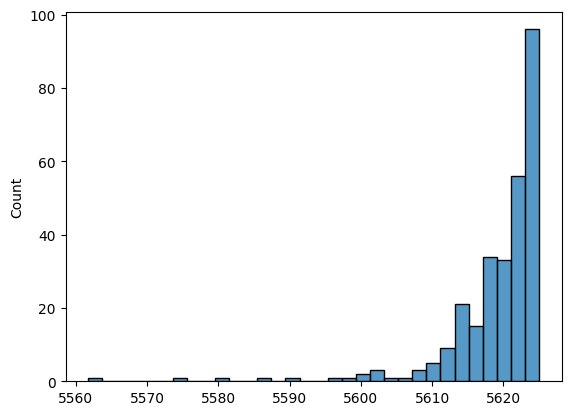

In [70]:
sns.histplot(sums)

In [71]:
np.max(sums)

np.float64(5625.0)

In [75]:
np.sum(sums < 5615)

np.int64(52)

In [76]:
sums.shape

(286,)

In [77]:
interesting[min_scores < 5e-2]

array(['233', '290', '441', '457', '506', '809', '1227', '1320', '1457',
       '1487', '1632', '1718', '1780', '1918', '1998', '2061', '2126',
       '2211', '2438', '2503', '2507', '2580', '2694', '2923', '3081',
       '3107', '3230', '3413', '3498', '3556', '3791', '3816', '3866',
       '4044', '4046', '4255', '4757', '4806', '5039', '5068', '5137',
       '5162', '5306', '5350', '5440', '5642', '5670', '5808', '5815'],
      dtype='<U4')

In [78]:
from scipy.stats import levene

grupy = [group['2580'].values for name, group in df.groupby('label')]
stat, p = levene(*grupy)

print(f"Test Levene'a (jednorodność wariancji): stat = {stat:.4f}, p-value = {p:.4e}")

Test Levene'a (jednorodność wariancji): stat = 1.0582, p-value = 3.4492e-01


In [79]:
p_values2 = []
statystyki2 = []
counter = 0
for colname in interesting:
    counter += 1
    if counter % 30 == 0:
        print(f"{counter//30}/10")
    grupy = [group[colname].values for name, group in df.groupby('label')]
    stat, p = levene(*grupy)
    p_values2.append(p)
    statystyki2.append(stat)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


In [80]:
p_values2 = np.array(p_values2)

In [81]:
p_values2.shape

(286,)

In [82]:
np.sum(p_values2 < 5e-2)

np.int64(11)

In [83]:
interesting[p_values2 < 5e-2]

array(['130', '1060', '1234', '1780', '1900', '2283', '2525', '4507',
       '4519', '4542', '5162'], dtype='<U4')

In [84]:
final = np.concat([new_features.ravel(), 
                   np.array(['233', '290', '441', '457', '506', '809', '1227', '1320', '1457',
       '1487', '1632', '1718', '1780', '1918', '1998', '2061', '2126',
       '2211', '2438', '2503', '2507', '2580', '2694', '2923', '3081',
       '3107', '3230', '3413', '3498', '3556', '3791', '3816', '3866',
       '4044', '4046', '4255', '4757', '4806', '5039', '5068', '5137',
       '5162', '5306', '5350', '5440', '5642', '5670', '5808', '5815']), 
                   np.array(['130', '1060', '1234', '1780', '1900', '2283', '2525', '4507',
       '4519', '4542', '5162'])])

In [85]:
final = np.unique(final)

In [86]:
final.shape

(136,)

In [87]:
final

array(['1017', '1057', '1060', '1072', '1142', '1227', '1234', '1289',
       '1296', '130', '1311', '1320', '1457', '1465', '1487', '1566',
       '1632', '1718', '1731', '1757', '1773', '1780', '1900', '1918',
       '1998', '2061', '2064', '2104', '2126', '2134', '2211', '2283',
       '2316', '233', '2438', '245', '2474', '2495', '2503', '2507',
       '2509', '2525', '2580', '2671', '2676', '2694', '2773', '2871',
       '2889', '290', '2923', '2926', '3034', '304', '3081', '3094',
       '3103', '3107', '3178', '3230', '3260', '3323', '3346', '3413',
       '3498', '3524', '3556', '3583', '3610', '3614', '363', '3661',
       '3663', '3675', '3791', '3816', '3819', '3840', '3866', '3946',
       '4005', '4006', '4017', '4044', '4046', '4152', '4171', '42',
       '4245', '4255', '4273', '441', '4455', '446', '4507', '4519',
       '4542', '457', '4630', '4643', '4674', '4676', '4687', '4757',
       '4806', '4852', '4989', '5039', '506', '5068', '5074', '5137',
       '5162', '52

In [88]:
df.head()

filename                     label           0          1           2  \
0  Image_1.jpg          SOUTHERN DOGFACE  -29.304474 -53.646305  157.319061   
1  Image_2.jpg                    ADONIS  108.749649 -99.934326   85.063881   
2  Image_3.jpg            BROWN SIPROETA  -72.921227  45.466625   -4.836839   
3  Image_4.jpg                   MONARCH  -58.314491 -20.460058  126.917984   
4  Image_5.jpg  GREEN CELLED CATTLEHEART  -28.536684 -75.453117  -35.900543   

           3          4          5          6           7  ...      5921  \
0 -37.507381  -8.112730  -9.215195 -18.801731   -7.313122  ...  3.331438   
1 -62.675640 -28.783670  87.016594  42.713871  -36.572647  ...  1.389709   
2  28.959473 -44.078339 -25.076443  17.222084  -26.771353  ... -0.689042   
3   0.923369 -30.056654 -33.215652 -11.057313  105.429039  ... -0.215495   
4 -79.561287   5.244801 -41.748314  65.563599   -6.384548  ...  6.245618   

       5922      5923      5924      5925      5926      5927      5928  \
0  4.045226  2.204854 -5.928223 -3.792308 -1.042500  0.018703 -2.548595   
1  0.111966  0.193220  0.895389  0.232029 -0.857234  0.477403 -3.163659   
2  2.492748 -1.598790 -3.116568 -2.399501  0.832368 -1.276818  0.761243   
3  0.344874 -0.066115 -0.937729  0.481706 -0.194572  1.618143 -1.837914   
4 -1.720825 -1.834850  1.126361  0.219346  1.820006  0.170160  3.006421   

       5929      5930  
0  0.367212 -0.804576  
1 -4.254457  0.319159  
2 -0.671634 -2.615820  
3  0.782260  1.481876  
4  6.997216  3.157905  

[5 rows x 5933 columns]

In [89]:
df_ = df.loc[:, list(final) + ["label", "filename"]]

In [90]:
df_.head()

1017       1057      1060      1072      1142       1227       1234  \
0   7.596840   1.260859 -2.661337 -7.354671  1.222998   8.113509  -3.084675   
1  -8.370394   2.347448  5.701302 -1.698649 -0.366418  -4.695348   1.433020   
2   0.889431 -11.887837  3.377158 -2.897351 -2.098257   7.316988   1.191194   
3 -11.000725   9.688002 -7.431757 -6.868082  5.614440  16.968906 -16.612377   
4  -8.828425  -0.579038 -5.670594 -1.216618  8.092880  -8.070213  -0.018944   

       1289      1296       130  ...        592       645        706  \
0 -9.264141 -2.320446  2.129072  ...   2.957865  1.485386  -3.574178   
1  0.617948  7.137634 -4.855431  ...   4.208344  2.193265  11.324963   
2 -0.274337 -3.276172  0.153445  ... -11.037733  5.907992   1.040053   
3 -0.540022 -7.483402 -3.436379  ...   4.126042 -4.751497   1.590644   
4 -3.156159 -0.942719 -4.765556  ...  -7.263869  6.624819   4.773612   

        716       809       851       916       975                     label  \
0 -2.148077 -7.703506 -3.626086 -9.860100 -0.052879          SOUTHERN DOGFACE   
1 -5.484943  0.149474  2.220419  4.771445  2.288587                    ADONIS   
2 -4.742660 -0.208085 -6.707069  2.133988  0.321524            BROWN SIPROETA   
3  5.285770 -5.386302  0.330339  2.951778  2.827478                   MONARCH   
4 -4.538306 -0.354895 -2.008906  0.076045 -2.571780  GREEN CELLED CATTLEHEART   

      filename  
0  Image_1.jpg  
1  Image_2.jpg  
2  Image_3.jpg  
3  Image_4.jpg  
4  Image_5.jpg  

[5 rows x 138 columns]

In [92]:
df_.to_csv("../data/exctracted_features.csv")

In [93]:
df_ = df_.iloc[:, :-2]

In [94]:
df_

1017       1057      1060      1072       1142       1227  \
0      7.596840   1.260859 -2.661337 -7.354671   1.222998   8.113509   
1     -8.370394   2.347448  5.701302 -1.698649  -0.366418  -4.695348   
2      0.889431 -11.887837  3.377158 -2.897351  -2.098257   7.316988   
3    -11.000725   9.688002 -7.431757 -6.868082   5.614440  16.968906   
4     -8.828425  -0.579038 -5.670594 -1.216618   8.092880  -8.070213   
...         ...        ...       ...       ...        ...        ...   
6494   7.039217 -11.484788  5.037605  7.860950  -6.010523  -6.252953   
6495  -3.075438  -0.056894  7.383121 -1.137723  13.491673   1.890991   
6496   7.653721 -12.042660 -4.570761 -9.573482   0.539912  -6.720084   
6497   0.108426   1.483487 -1.423935  0.443054   4.888373   0.545522   
6498   6.585769   0.192970 -7.236231 -9.945757   6.243907  -1.515802   

           1234      1289      1296        130  ...      5815      5818  \
0     -3.084675 -9.264141 -2.320446   2.129072  ...  2.305168 -0.989632   
1      1.433020  0.617948  7.137634  -4.855431  ... -0.815111 -0.877514   
2      1.191194 -0.274337 -3.276172   0.153445  ...  4.274930 -2.284498   
3    -16.612377 -0.540022 -7.483402  -3.436379  ...  0.573299  2.142847   
4     -0.018944 -3.156159 -0.942719  -4.765556  ...  1.103737  8.496441   
...         ...       ...       ...        ...  ...       ...       ...   
6494  -7.546303 -3.984872  5.644079 -14.296571  ... -0.120438  2.390294   
6495  -7.701762 -0.911437 -9.368864  -8.577464  ...  2.179571 -1.431064   
6496  -7.038035 -2.659959 -6.671000 -40.091854  ... -0.052467 -1.483808   
6497  -4.767154 -3.798210 -1.008499   1.909408  ... -3.773049  3.011365   
6498   6.095541 -3.989421  0.647677  -6.462664  ... -2.355105 -0.699742   

            592        645        706       716       809        851  \
0      2.957865   1.485386  -3.574178 -2.148077 -7.703506  -3.626086   
1      4.208344   2.193265  11.324963 -5.484943  0.149474   2.220419   
2    -11.037733   5.907992   1.040053 -4.742660 -0.208085  -6.707069   
3      4.126042  -4.751497   1.590644  5.285770 -5.386302   0.330339   
4     -7.263869   6.624819   4.773612 -4.538306 -0.354895  -2.008906   
...         ...        ...        ...       ...       ...        ...   
6494  -0.891172  -3.834170  -6.477248 -4.016263  2.900487   1.903056   
6495  -4.131580  -4.878425  -2.295181 -5.058033 -3.524113  -2.801986   
6496  -8.852106   9.735405   4.858512 -1.403446 -7.058358   1.224913   
6497   0.421173 -11.009806  -1.611145 -2.701876 -3.515019   4.117524   
6498  -7.436798  10.668649   1.094087  1.653931  5.693583 -10.036578   

           916        975  
0    -9.860100  -0.052879  
1     4.771445   2.288587  
2     2.133988   0.321524  
3     2.951778   2.827478  
4     0.076045  -2.571780  
...        ...        ...  
6494  2.450982   3.072494  
6495 -8.539879   9.982493  
6496 -1.190288  12.307190  
6497  4.501469   5.342321  
6498 -0.774801  -4.133169  

[6499 rows x 136 columns]

<Axes: >

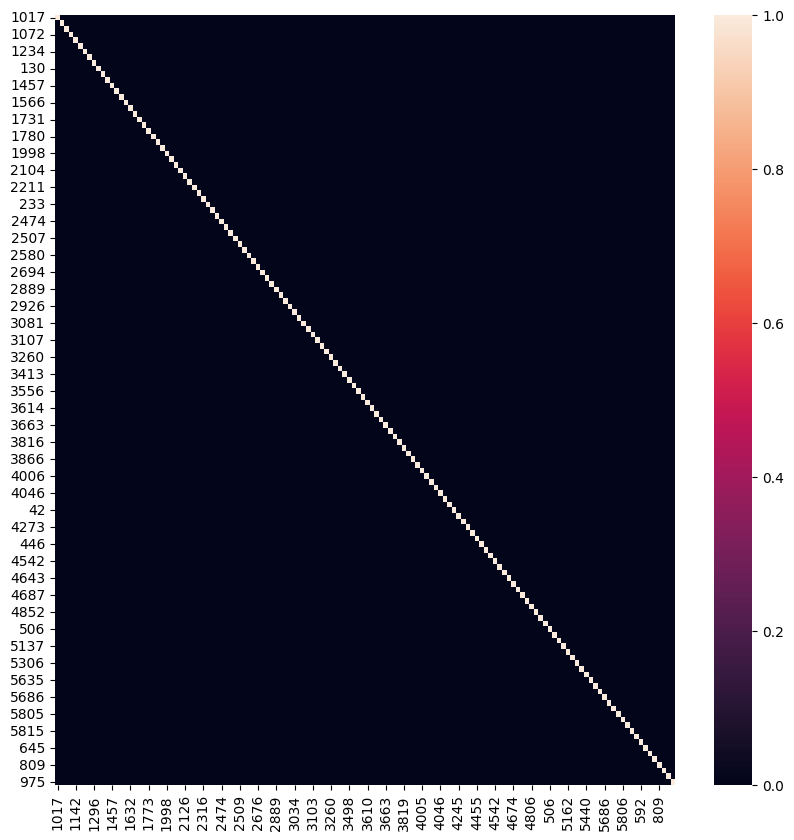

In [97]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_.corr())

In [98]:
interesting[sums < 5610]

array(['506', '1227', '1918', '2009', '2438', '2507', '2580', '3791',
       '4044', '4806', '5068', '5137', '5162', '5259', '5306', '5642',
       '5670', '5808'], dtype='<U4')

In [100]:
my = df.loc[:, ['506', '1227', '1918', '2009', '2438', '2507', '2580', '3791',
       '4044', '4806', '5068', '5137', '5162', '5259', '5306', '5642',
       '5670', '5808']]

In [101]:
my

506       1227      1918      2009       2438      2507      2580  \
0      5.696002   8.113509  0.658483 -1.250011  -5.663311  5.142271 -0.266103   
1     -1.688267  -4.695348 -3.366783  4.680978  -1.738964  1.962856 -0.012715   
2     10.368436   7.316988  1.348861  8.319651   0.599817  5.137574  7.305800   
3     15.977923  16.968906  5.339411  5.618819   3.713774 -3.056375 -1.397089   
4     -7.991222  -8.070213  1.457809  1.275818  -4.027425  1.710556 -3.458279   
...         ...        ...       ...       ...        ...       ...       ...   
6494  -1.657262  -6.252953 -1.016361  6.625069  -3.977040 -5.911918 -0.121054   
6495  -1.020350   1.890991  0.489469  1.515090  -0.788029 -0.075998  2.758196   
6496  16.044327  -6.720084  7.442418 -9.010922 -10.099348 -1.425233 -1.995471   
6497   8.454060   0.545522 -1.312018  3.484382  -0.103378 -2.916644 -2.358454   
6498 -15.849406  -1.515802  0.720759 -1.692719   3.092539  9.381444  6.953963   

          3791      4044      4806      5068      5137      5162      5259  \
0     1.226528 -1.258501  4.121150  1.619179 -5.675642 -1.115763  7.737728   
1     1.887980 -0.189972  3.495565  0.693157  1.211072  0.594971  5.987382   
2    -0.227729  2.272859 -0.481106  3.203186  3.314932  1.818207  9.217251   
3    -2.900157 -0.502314  1.192102 -3.190682 -0.357493 -0.634435  2.009776   
4     1.149588  0.486125 -7.448283 -0.937741 -2.419723 -1.272087 -3.580620   
...        ...       ...       ...       ...       ...       ...       ...   
6494  2.565627 -1.214399 -0.119137 -7.332702 -1.148927  2.955294  1.030426   
6495  2.413057 -6.184380  0.979956  3.211870 -1.644495 -3.709523 -5.235048   
6496  4.013385  0.038961  0.303633  0.835459  3.242582  2.946269 -1.745625   
6497 -3.650985  2.655925  0.634014 -2.951757  4.355991  1.577033 -0.928503   
6498  3.510906  0.667589  1.098056  1.254940  3.852783  1.438849 -0.638988   

          5306      5642      5670      5808  
0    -4.248904 -1.441702  1.265655 -1.374174  
1    -0.324445 -3.257913 -3.790055  2.039392  
2     4.166891  3.947119  0.033676  1.268083  
3     1.226511  2.294956 -0.068817  0.149223  
4     0.270376 -5.538687 -2.932399 -2.673060  
...        ...       ...       ...       ...  
6494  1.299273 -1.620767  6.711403 -1.607441  
6495 -0.468907 -2.407447 -1.489615  0.062060  
6496  0.340302  1.596024  3.194776 -1.580711  
6497  5.285692  2.352183 -3.607049  4.162212  
6498  1.141648 -1.963519 -0.070071  1.246286  

[6499 rows x 18 columns]

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
for eps in range(1, 20, 5):
    dbscan = DBSCAN(eps=eps)
    preds = dbscan.fit_predict(my)
    print(f"{eps:>5} -> Fraction of outliers: {np.mean(preds == -1):.2f}")

    1 -> Fraction of outliers: 1.00
    6 -> Fraction of outliers: 1.00
   11 -> Fraction of outliers: 0.41
   16 -> Fraction of outliers: 0.00


In [104]:
min_samples_list = np.arange(2, 21, 1)
epss = np.arange(10, 16, 1)

n_clusters_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(my)

        n_clusters_1st[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_1st[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->

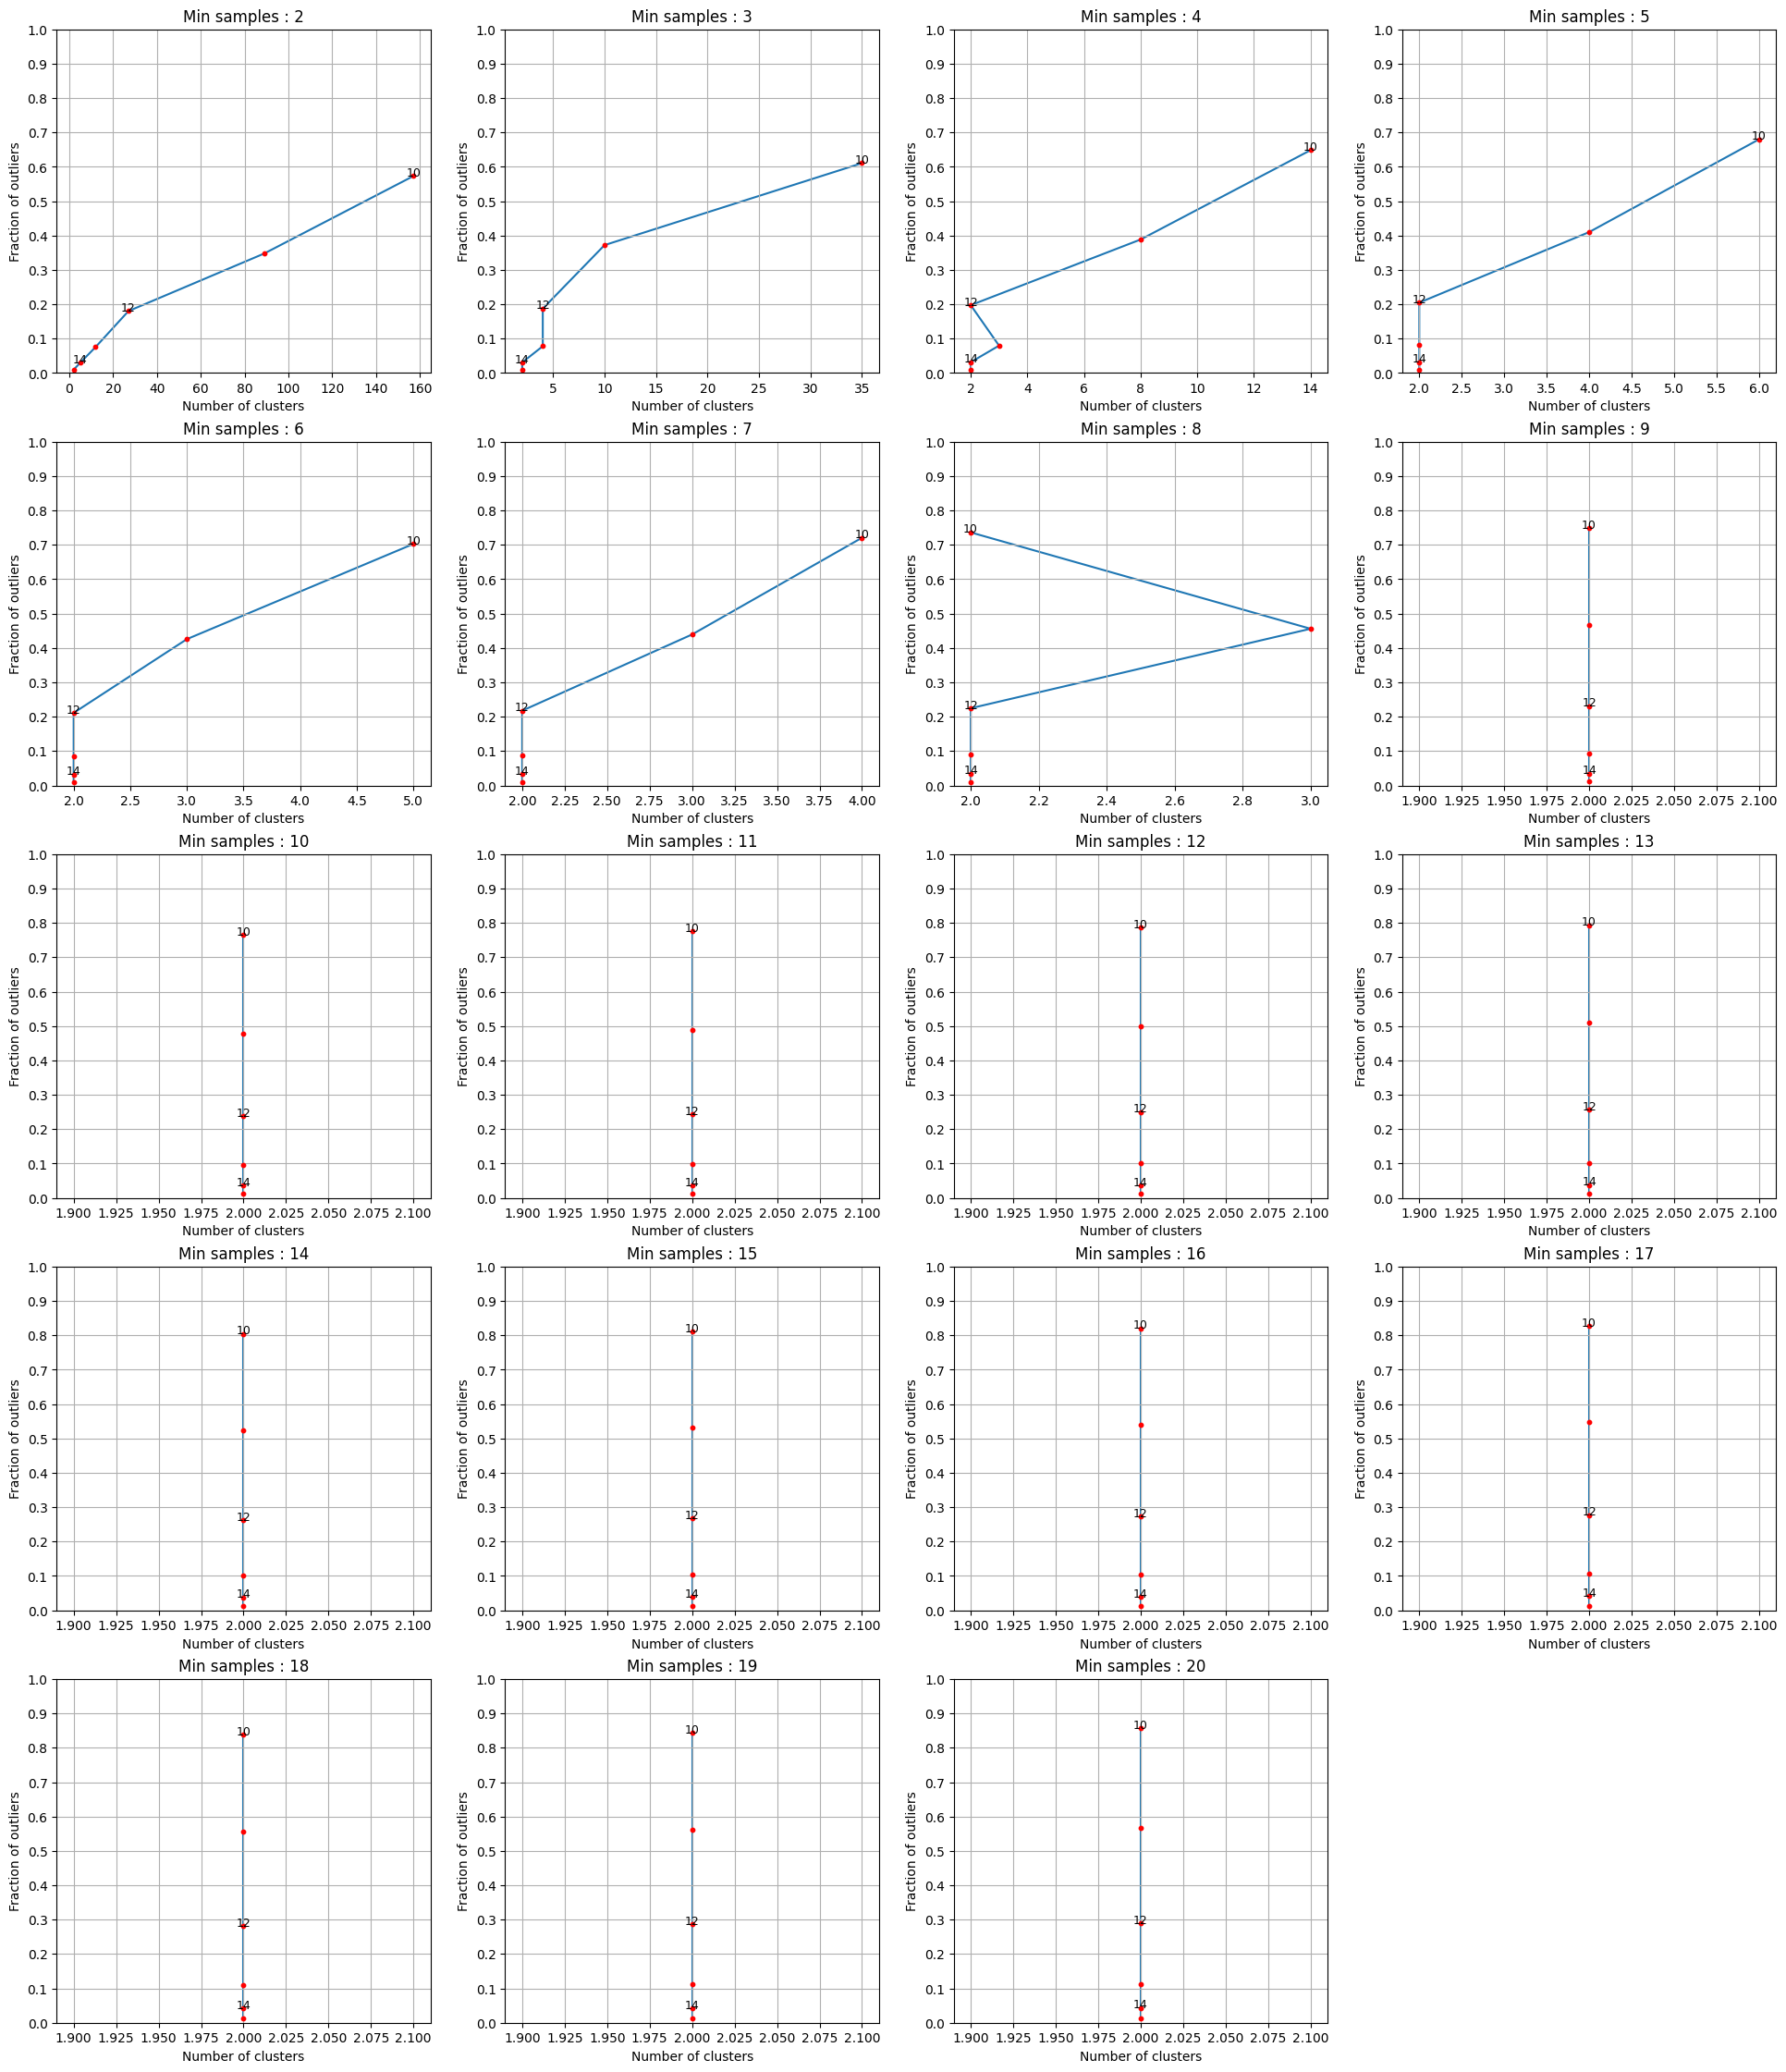

In [105]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1)
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters_1st.shape[0], 2):
        plt.text(n_clusters_1st[i, counter], fraction_of_outliers_1st[i, counter], epss[i], ha='center', fontsize=9, zorder=3)
    

In [106]:
dbscan = DBSCAN(min_samples=4, eps=13)

In [107]:
preds = dbscan.fit_predict(my)

In [108]:
np.unique(preds, return_counts=True)

(array([-1,  0,  1]), array([ 518, 5977,    4]))